# Trabalho de Estatística

**Equipe:**

* Charles Santana
* Everton da Silva
* Luiz Filho
* Maísa Vidal
* Paulo Correa
* Tiago Moura


<font size=14><b> Estudo de Caso </b>

<justify>
<h1>Base de dados da ANAAC, a qual fez registro, e ainda faz, de todos os vôos realizadas pela aeronave desde a sua decolagem até o próximo pouso, independente de onde tenha sido realizado o embarque ou o desembarque do objeto de transporte.<br> Os dados estatísticos das etapas básicas representam o status da aeronave em cada etapa do voo, apresentando a movimentação de cargas e passageiros entre os aeródromos de origem e destino da aeronave. Registros contemplam todos os anos desde 2000.<h1>
</justify>

# 1. Pré-Processamento

## 1.1 Importação das Bibliotecas Necessárias

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sys

import statistics as st
from scipy import stats
from collections import Counter
import math

## 1.2 Base de Dados

## 1.2.1 Completa

In [2]:
dataset = pd.read_csv('DadosEstatisticos-com-colunas-de-interesse.csv',sep=';',encoding = 'latin-1')
dataset.dropna()

,EMPRESA (SIGLA),EMPRESA (NOME),EMPRESA (NACIONALIDADE),ANO,MÊS,AEROPORTO DE ORIGEM (SIGLA),AEROPORTO DE ORIGEM (NOME),AEROPORTO DE ORIGEM (UF),AEROPORTO DE ORIGEM (REGIÃO),AEROPORTO DE ORIGEM (PAÍS),...,NATUREZA,PASSAGEIROS PAGOS,PASSAGEIROS GRÁTIS,CARGA PAGA (KG),CARGA GRÁTIS (KG),DISTÂNCIA VOADA (KM),DECOLAGENS,ASSENTOS,HORAS VOADAS,BAGAGEM (KG)
342,ABJ,ABAETÉ LINHAS AÉREAS S.A.,BRASILEIRA,2000,1,SBCV,CARAVELAS,BA,NORDESTE,BRASIL,...,DOMÉSTICA,12.0,1.0,0.0,0.0,537.0,1.0,15.0,"1,52",120.0
343,ABJ,ABAETÉ LINHAS AÉREAS S.A.,BRASILEIRA,2000,1,SBCV,CARAVELAS,BA,NORDESTE,BRASIL,...,DOMÉSTICA,1.0,0.0,0.0,0.0,368.0,8.0,120.0,"2,73",0.0
344,ABJ,ABAETÉ LINHAS AÉREAS S.A.,BRASILEIRA,2000,1,SBLP,BOM JESUS DA LAPA,BA,NORDESTE,BRASIL,...,DOMÉSTICA,68.0,1.0,3.0,0.0,3864.0,7.0,105.0,"12,93",579.0
345,ABJ,ABAETÉ LINHAS AÉREAS S.A.,BRASILEIRA,2000,1,SBLP,BOM JESUS DA LAPA,BA,NORDESTE,BRASIL,...,DOMÉSTICA,0.0,2.0,54.0,0.0,1778.0,14.0,210.0,"8,17",0.0
346,ABJ,ABAETÉ LINHAS AÉREAS S.A.,BRASILEIRA,2000,1,SBSV,SALVADOR,BA,NORDESTE,BRASIL,...,DOMÉSTICA,4.0,1.0,0.0,0.0,537.0,1.0,15.0,"1,65",15.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886460,VDA,VOLGA DNEPR AIRLINES,ESTRANGEIRA,2020,8,SBBR,BRASÍLIA,DF,CENTRO-OESTE,BRASIL,...,INTERNACIONAL,0.0,0.0,0.0,0.0,798.0,1.0,0.0,"1,333",0.0
886489,VVC,VIVAAIR - FASTCOLOMBIA,ESTRANGEIRA,2020,7,SBGR,GUARULHOS,SP,SUDESTE,BRASIL,...,INTERNACIONAL,0.0,0.0,0.0,0.0,8091.0,3.0,564.0,"12,417",0.0
886494,VVC,VIVAAIR - FASTCOLOMBIA,ESTRANGEIRA,2020,8,SBGR,GUARULHOS,SP,SUDESTE,BRASIL,...,INTERNACIONAL,0.0,0.0,0.0,0.0,2697.0,1.0,188.0,"3,967",0.0
886501,WAL,CARIBBEAN SUN AIRLINES DBA WORLD ATLANTIC AIRL...,ESTRANGEIRA,2020,5,SBEG,MANAUS,AM,NORTE,BRASIL,...,INTERNACIONAL,0.0,0.0,0.0,0.0,2697.0,1.0,155.0,"3,5",0.0


### 1.2.2 Descrição da Base de Dados
#### Médias, mínimas, máximas, etc.

In [3]:
dataset.describe()

,ANO,MÊS,PASSAGEIROS PAGOS,PASSAGEIROS GRÁTIS,CARGA PAGA (KG),CARGA GRÁTIS (KG),DISTÂNCIA VOADA (KM),DECOLAGENS,ASSENTOS,BAGAGEM (KG)
count,886509.000000,886509.000000,841719.000000,841719.000000,8.417190e+05,841719.000000,6.693110e+05,669847.000000,669846.000000,713859.000000
mean,2009.606717,6.460133,1929.220643,41.811299,2.376162e+04,247.191185,3.483849e+04,26.859036,3693.092381,23340.739691
std,5.900236,3.483967,4484.415889,154.505241,9.281107e+04,1982.754998,6.645658e+04,46.488975,7279.524038,52087.003366
min,2000.000000,1.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,2004.000000,3.000000,1.000000,0.000000,0.000000e+00,0.000000,1.644000e+03,2.000000,70.000000,85.000000
50%,2010.000000,6.000000,206.000000,0.000000,3.200000e+01,0.000000,8.584000e+03,11.000000,694.000000,2766.000000
75%,2015.000000,10.000000,1773.000000,20.000000,7.597000e+03,0.000000,3.549250e+04,31.000000,4563.000000,20658.000000
max,2020.000000,12.000000,92357.000000,7452.000000,4.018286e+06,189562.000000,1.015740e+06,918.000000,154845.000000,919417.000000


In [4]:
print("Número de registros do dataset:",len(dataset))

Número de registros do dataset: 886509


In [5]:
dataset.groupby(['NATUREZA'])['DECOLAGENS'].sum()

NATUREZA
DOMÉSTICA        15654456.0
INTERNACIONAL     2336989.0
Name: DECOLAGENS, dtype: float64

In [18]:
dataset = dataset.rename(columns={'HORAS VOADAS': 'HORAS_VOADAS','AEROPORTO DE ORIGEM (NOME)':'AEROPORTO','PASSAGEIROS PAGOS':'PASSAGEIROS_PAGOS','AEROPORTO DE DESTINO (NOME)':'AEROPORTO_DESTINO'})
df_manaus = dataset.query(f'AEROPORTO == "MANAUS"')

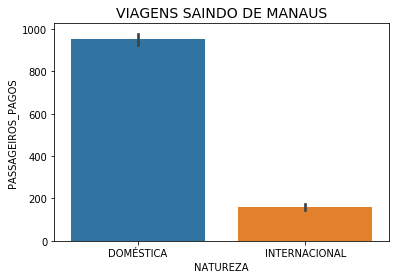

In [7]:
plt.title('VIAGENS SAINDO DE MANAUS', fontsize=14)
sns.barplot(x = 'NATUREZA', y = 'PASSAGEIROS_PAGOS', data=df_manaus);

Text(0.5, 1.0, 'Classificação de voos - Origem Manaus')

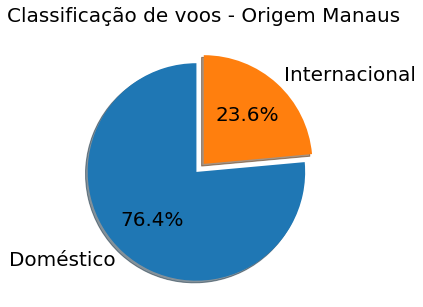

In [8]:
plt.rcParams.update({'font.size':20})
label = ['Doméstico', 'Internacional']
x = df_manaus.groupby(by='NATUREZA').size()
explode = (0.1,0)
plt.figure(figsize=(5,5))
plt.pie(x=x, labels=label,explode=explode, autopct='%1.1f%%', startangle=90, shadow=True)
plt.title('Classificação de voos - Origem Manaus',fontsize=20)

In [17]:
dataset_manaus_2017 = dataset[dataset['ANO']==2017] 
_dataset_manaus = dataset_manaus_2017[dataset_manaus_2017['AEROPORTO']=='MANAUS'] 
groupby_manaus_2017 = _dataset_manaus[['AEROPORTO','AEROPORTO_DESTINO','MÊS','ANO','BAGAGEM (KG)']].groupby(_dataset_manaus['BAGAGEM (KG)'])
groupby_manaus_2017.head(12)

,AEROPORTO,AEROPORTO_DESTINO,MÊS,ANO,BAGAGEM (KG)
747866,MANAUS,"NEW YORK, NEW YORK",1,2017,NaN
747867,MANAUS,"MIAMI, FLORIDA",1,2017,NaN
747868,MANAUS,NASSAU/INTL NEW PROVIDENCE,1,2017,NaN
747892,MANAUS,"MIAMI, FLORIDA",2,2017,NaN
747916,MANAUS,"MIAMI, FLORIDA",3,2017,NaN
...,...,...,...,...,...
786504,MANAUS,COARI,9,2017,15787.0
786524,MANAUS,TEFÉ,10,2017,406.0
786525,MANAUS,COARI,10,2017,15006.0
786551,MANAUS,COARI,11,2017,15697.0


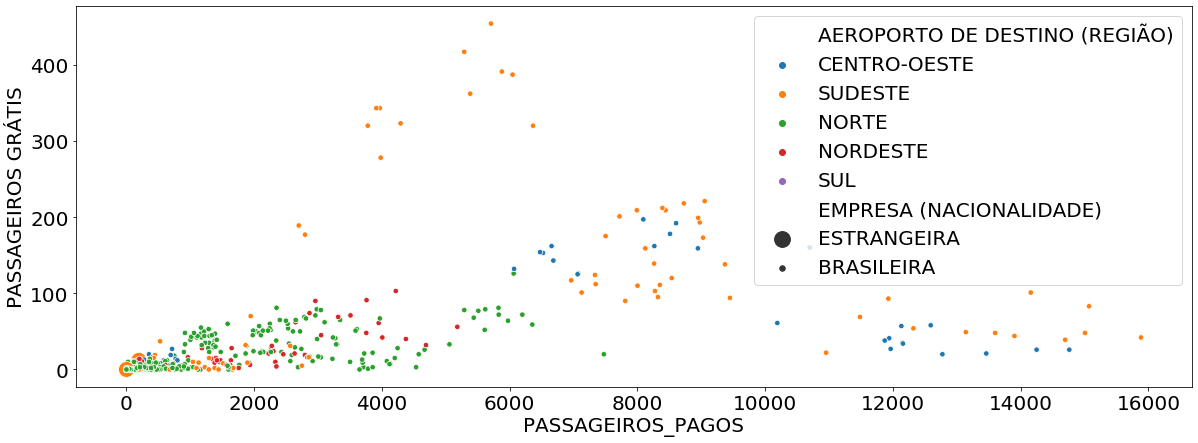

In [10]:
f, ax = plt.subplots(figsize=(20, 7))
disperssao = sns.scatterplot(x = 'PASSAGEIROS_PAGOS', y = 'PASSAGEIROS GRÁTIS', data=_dataset_manaus,
            hue = 'AEROPORTO DE DESTINO (REGIÃO)', size = 'EMPRESA (NACIONALIDADE)',sizes=(30,250));

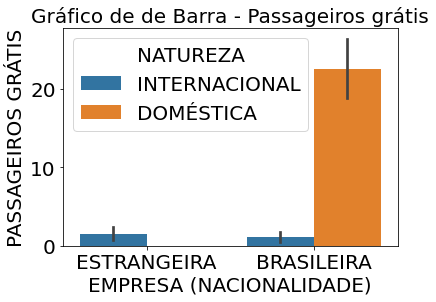

In [21]:
plt.title('Gráfico de de Barra - Passageiros grátis', fontsize=20)
sns.barplot(x = 'EMPRESA (NACIONALIDADE)', y = 'PASSAGEIROS GRÁTIS', data=_dataset_manaus, hue = 'NATUREZA');

In [23]:
dataset.loc[dataset.NATUREZA == 'DOMÉSTICA'].groupby(['ANO'])['DECOLAGENS'].sum()

ANO
2000    703553.0
2001    741064.0
2002    685853.0
2003    543580.0
2004    528501.0
2005    562529.0
2006    590194.0
2007    641087.0
2008    662764.0
2009    738445.0
2010    851663.0
2011    964598.0
2012    998323.0
2013    954221.0
2014    949062.0
2015    942342.0
2016    834666.0
2017    811665.0
2018    822592.0
2019    809925.0
2020    317829.0
Name: DECOLAGENS, dtype: float64

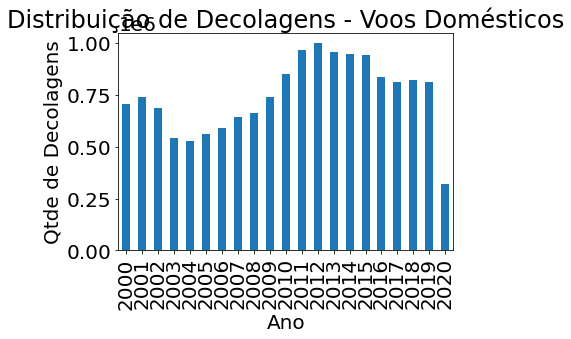

In [24]:
dataset.loc[dataset.NATUREZA == 'DOMÉSTICA'].groupby(['ANO'])['DECOLAGENS'].sum().plot(kind='bar', title='Distribuição de Decolagens - Voos Domésticos', xlabel='Ano',ylabel='Qtde de Decolagens')

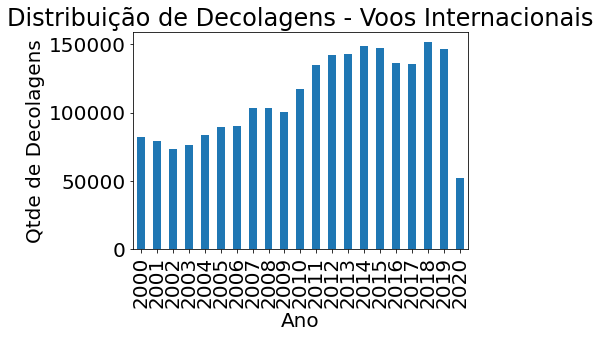

In [26]:

dataset.loc[dataset.NATUREZA == 'INTERNACIONAL'].groupby(['ANO'])['DECOLAGENS'].sum().plot(kind='bar', title='Distribuição de Decolagens - Voos Internacionais', xlabel='Ano',ylabel='Qtde de Decolagens')

In [100]:
def showVolumeBagagens():
  _dataset_manaaus_bagagens = dataset.loc[dataset['AEROPORTO'] == 'MANAUS'].groupby(['ANO'])['BAGAGEM (KG)'].size().reset_index().rename(columns={0: 'Total', 'publicationDate':'Date'})
  _dataset_manaaus_bagagens = f = _dataset_manaaus_bagagens.rename(columns={'publicationDate':'Date'})

  x = _dataset_manaaus_bagagens['ANO']
  y = _dataset_manaaus_bagagens['BAGAGEM (KG)']
  plt.figure(figsize=(30,10))#tamanho do grafico
  plt.plot(x,y,label='Volume de Bagagens dos voos de Manaus',color='red',linestyle='dashed',linewidth=2,marker = "*")
  #titulo
  plt.title('Volume de Bagagens dos voos que partem de Manaus')
  #EIXO X
  plt.xlabel('ANO')
  #EIXO Y 
  plt.ylabel('BAGAGEM (KG)')
  plt.grid(True)
  plt.legend()

In [133]:
def qntdDestinosDeManaus():
  fig = plt.figure(figsize=(30,10))
  plt.title("Quantidade dos destinos dos voos que partem de Manaus")
  plt.xticks(fontsize=15)
  plt.yticks(fontsize=15)
  sns.countplot(y='AEROPORTO',order=_dataset_manaus['AEROPORTO'].value_counts().iloc[:20].index, data=_dataset_manaus, palette='crest')

In [134]:
def coeficient_of_variation(var):
  _cv = round(100*st.stdev(var)/st.mean(var), 2)
  return _cv

In [135]:
def plotBox(colum):
  _res_boxplot = sns.boxplot(_dataset_manaus[colum])
  _res_boxplot.figure.set_size_inches(15,7)
  _res_boxplot.set_title(colum, fontsize=20)

In [136]:
def plotDist(colum):
  _res_boxplot = sns.distplot(_dataset_manaus[colum])
  _res_boxplot.figure.set_size_inches(15,7)
  _res_boxplot.set_title(colum, fontsize=20)

In [142]:
def plotPizza(colum,*item):
  plt.rcParams.update({'font.size':20})
  label = [*item]
  x = _dataset_manaus.groupby(by=colum).size()
  explode = (0.1,0)
  plt.figure(figsize=(10,10))
  plt.pie(x=x, labels=label,explode=explode, autopct='%1.1f%%', startangle=90, shadow=True)
  plt.title('Classificação de voos Manaus',fontsize=20)



dataframe.describe()[texto do link]


In [137]:
def functionStatiscals_manaus(colum):
  _res = 0
  i = 0
  passageiros_gratis = []
  for x in _dataset_manaus[colum]:
    # print(np.asarray(x))
    x = np.asarray(x)
    i = i + 1
    if not math.isnan(x):
      _res = _res + int(x)
      
      passageiros_gratis.append(int(x))
  
  print(f'{colum:#^90}\n')
#   print(f'A média é: {round(st.mean(passageiros_gratis))}')
#   print(f'A mediana é: {round(st.median(passageiros_gratis))}')
#   print(f'A moda é: {round(st.mode(passageiros_gratis))}')
#   print(f'A desvio padrão é: {round(st.pstdev(passageiros_gratis))}')
#   print(f'A variância é: {round(st.variance(passageiros_gratis))}')
#   print(f'A coeficiente de variação é: {coeficient_of_variation(passageiros_gratis)}')
  media = round(st.mean(passageiros_gratis))
  mediana = round(st.median(passageiros_gratis))
  moda = round(st.mode(passageiros_gratis))
  desstandard = round(st.pstdev(passageiros_gratis))
  variancia = round(st.variance(passageiros_gratis))
  coeficiente_de_variação = coeficient_of_variation(passageiros_gratis)
  resultdescribe = stats.describe(_dataset_manaus[colum].dropna())
  line = [media,mediana,moda,desstandard,variancia,coeficiente_de_variação]
  print(f'Média        Mediana       Moda   Desvio Padrão    Variância       Coeficiente de Variação\n')
  print(f'{media}   {mediana:>13,.2f} {moda:>9,.2f}     {desstandard:>1,.2f}     {variancia:>9,.2f}      {coeficiente_de_variação:>11,.2f}') 
#   print(f'Describe {resultdescribe}')

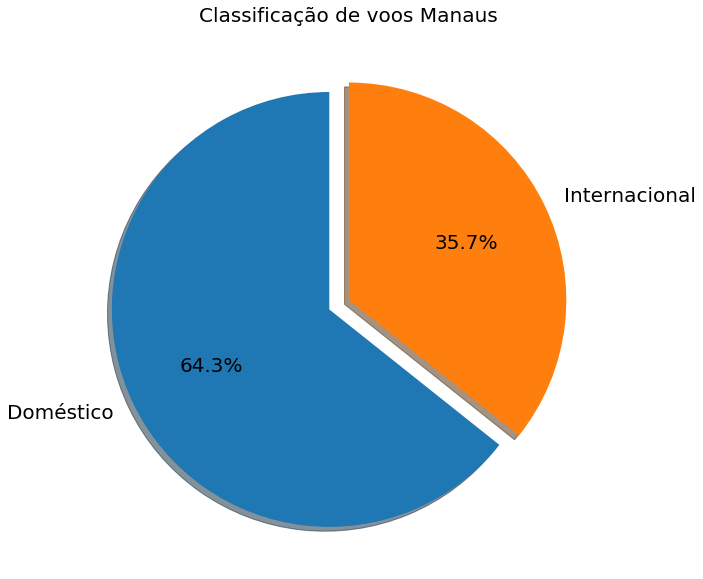

In [143]:
plotPizza('NATUREZA','Doméstico', 'Internacional')

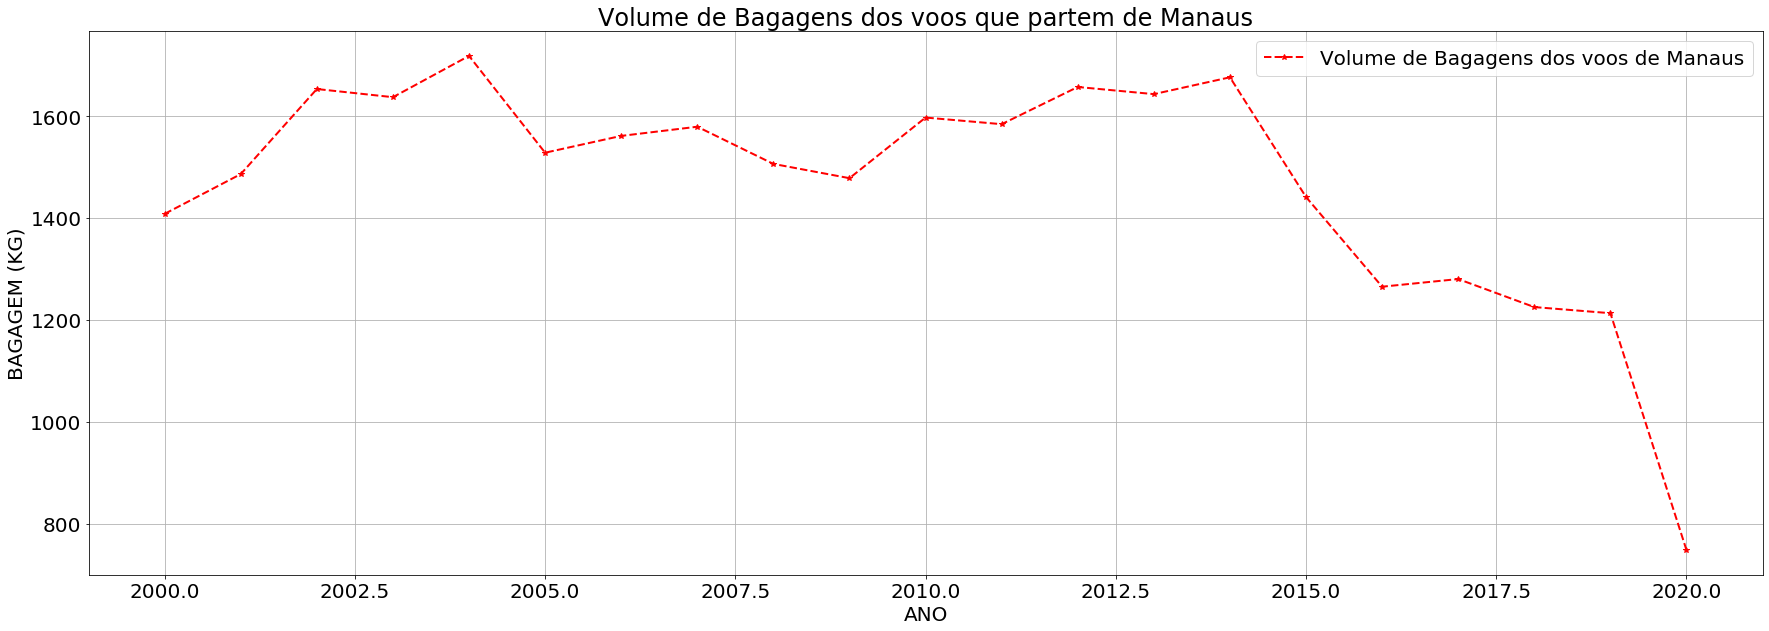

In [138]:
showVolumeBagagens()

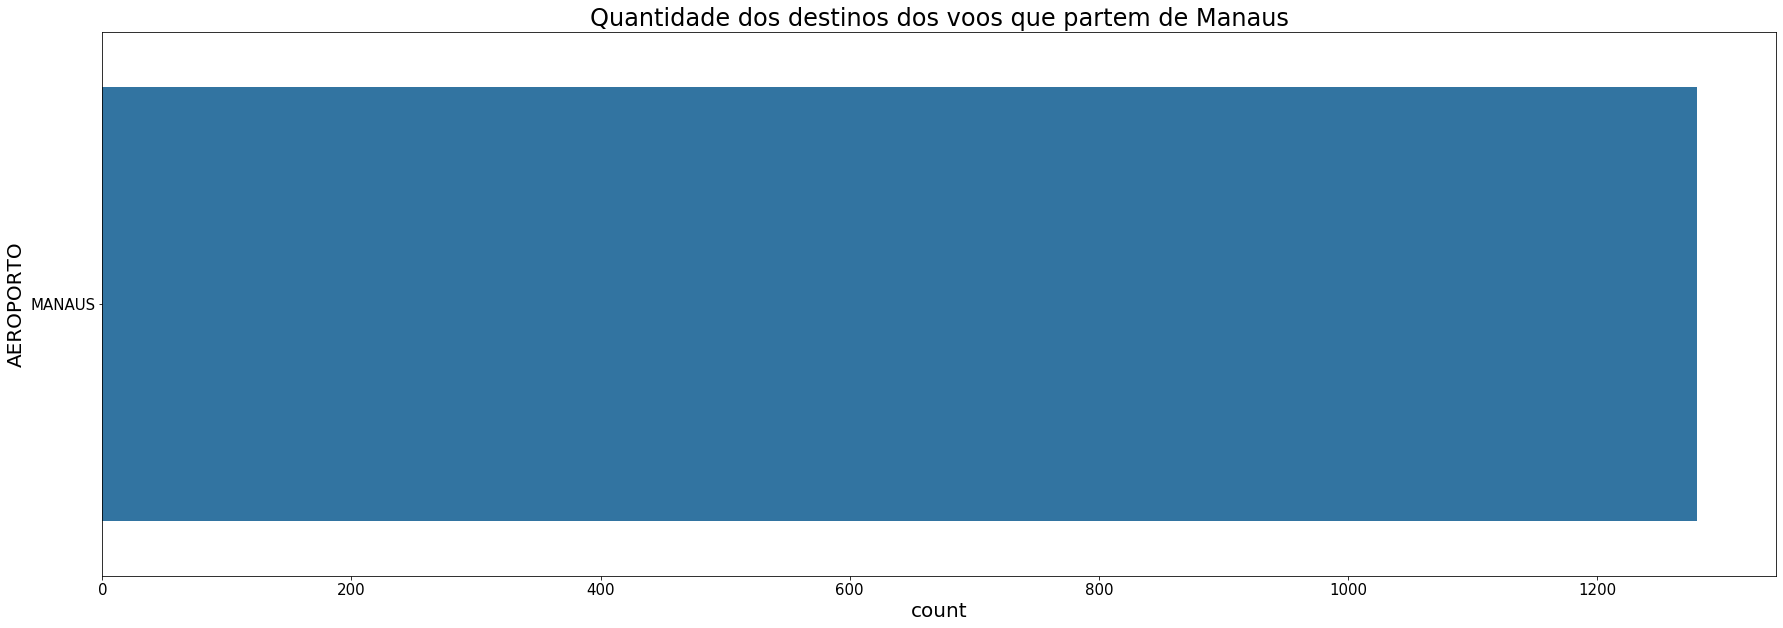

In [139]:
qntdDestinosDeManaus()

In [98]:
functionStatiscals_manaus('BAGAGEM (KG)')

#######################################BAGAGEM (KG)#######################################

Média        Mediana       Moda   Desvio Padrão    Variância       Coeficiente de Variação

14932        1,618.00      0.00     30,924.00     957,265,658.00           207.21


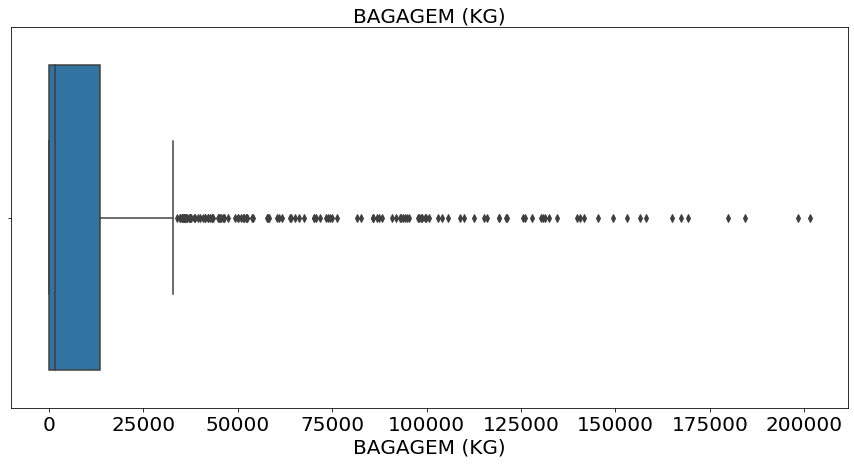

In [26]:
plotBox('BAGAGEM (KG)')

In [144]:
functionStatiscals_manaus('CARGA GRÁTIS (KG)')

####################################CARGA GRÁTIS (KG)#####################################

Média        Mediana       Moda   Desvio Padrão    Variância       Coeficiente de Variação

56            0.00      0.00     436.00     190,321.00           783.06


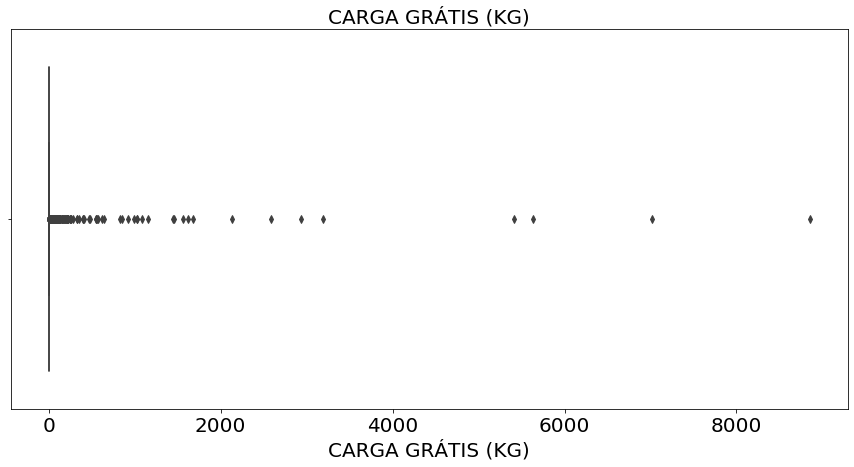

In [145]:
plotBox('CARGA GRÁTIS (KG)')

RuntimeError: Selected KDE bandwidth is 0. Cannot estiamte density.

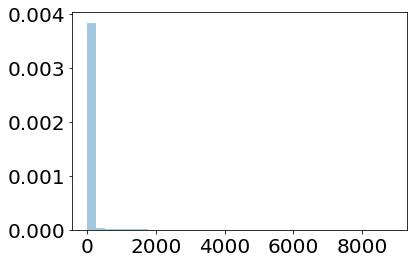

In [147]:
plotDist('CARGA GRÁTIS (KG)')